In [2]:
import calour as ca
import calour_utils as cu
import matplotlib.pyplot as plt
import pandas as pd

failed to load logging config file


In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


In [7]:
import matplotlib
matplotlib.rc('ytick', labelsize=7)
plt.rc('font',size=7)

# The dbBact release to use

In [8]:
# max_id = 3925 # release 2020.10
max_id = 6237 # release 2021.05

# Bank voles in radiation contaminated and non-contaminated regions
Skin and gut microbiomes of a wild mammal respond to different environmental cues

In [9]:
dat=ca.read_amplicon('./all.vole.biom',
                    './map.vole.txt',
                    min_reads=1000,
                    normalize=10000)

2021-06-06 15:58:57 INFO loaded 430 samples, 15454 features
2021-06-06 15:58:57 WARNING These have metadata but do not have data - dropped (1): {'ERR2722536'}
2021-06-06 15:58:57 WARNING Do you forget to normalize your data? It is required before running this function
2021-06-06 15:58:57 INFO After filtering, 430 remain.


In [10]:
dat=cu.filter_16s(dat)

In [11]:
datc=dat.cluster_features(10)

2021-06-06 13:24:49 INFO After filtering, 7696 remain.


In [12]:
skin=datc.filter_samples('sample_type','skin')

In [13]:
dd=skin.diff_abundance('replicate',['KL1','KL2'], random_seed=2018)

2021-06-06 13:24:58 INFO After filtering, 7551 remain.
2021-06-06 13:24:58 INFO 46 samples with value 1 (['KL1', 'KL2'])
2021-06-06 13:25:05 INFO number of higher in KL1,KL2: 332. number of higher in NOT KL1,KL2 : 1240. total 1572


2021-06-06 13:25:21 INFO Getting dbBact annotations for 1572 sequences, please wait...
2021-06-06 13:25:28 INFO got 3328 annotations
2021-06-06 13:25:28 WARNING ignoring 0 annotation with id > max_id 6237
2021-06-06 13:25:28 INFO Got 32994 annotation-sequence pairs
2021-06-06 13:25:28 INFO Added annotation data to experiment. Total 3328 annotations, 1572 ASVs
2021-06-06 13:25:28 INFO Found 1 experiments ([423]) matching current experiment - ignoring them.
2021-06-06 13:25:36 INFO found 7 negative
2021-06-06 13:25:48 INFO found 7 positive


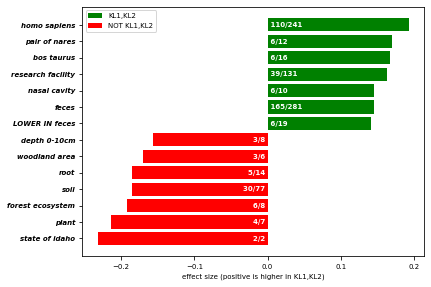

In [14]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True, min_appearances=2, num_results_needed=7, max_show=7, random_seed=2018,max_id=max_id)

In [15]:
f.set_xlim([-0.25,0.25])

(-0.25, 0.25)

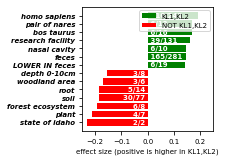

In [16]:
f.figure.set_size_inches(2.3,2)
f.figure

In [17]:
e.feature_metadata.to_csv('./terms-vole.csv')

In [18]:
f.figure.savefig('./fig6-terms-vole.pdf')

In [19]:
f.figure.savefig('./fig6-terms-vole.svg')

2021-06-06 13:26:04 INFO found 69 annotations with the term ['plant']
2021-06-06 13:26:06 INFO ignored 0 annotations
2021-06-06 13:26:06 WARNING Clipped term circle size to 1000. Real size (number of term seqs not overlapping) should be: 8708


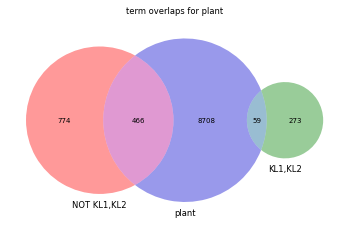

In [20]:
f=db.plot_term_venn_all(['plant'],dd,max_size=1000,max_id=max_id)

In [21]:
f.savefig('./fig6-venn-vole-plant.pdf')

In [22]:
dd

AmpliconExperiment with 155 samples, 1572 features

# Dust Israel

In [10]:
dat=ca.read_amplicon('./all.dust.biom',
                     './mat.dust.txt',
                     normalize=10000,min_reads=1000)

2021-06-06 15:59:48 INFO loaded 31 samples, 4222 features
2021-06-06 15:59:48 WARNING Do you forget to normalize your data? It is required before running this function
2021-06-06 15:59:48 INFO After filtering, 31 remain.


In [24]:
datc=dat.cluster_features(10)

2021-06-06 13:26:12 INFO After filtering, 2408 remain.


In [25]:
dd=datc.diff_abundance('Dust_origin_s','Ambient','North Africa',random_seed=2018)

2021-06-06 13:26:15 INFO 17 samples with both values
2021-06-06 13:26:15 INFO After filtering, 2303 remain.
2021-06-06 13:26:15 INFO 9 samples with value 1 (['Ambient'])
2021-06-06 13:26:16 INFO number of higher in Ambient: 167. number of higher in North Africa : 416. total 583


2021-06-06 13:26:17 INFO Getting dbBact annotations for 583 sequences, please wait...
2021-06-06 13:26:20 INFO got 2253 annotations
2021-06-06 13:26:20 WARNING ignoring 0 annotation with id > max_id 6237
2021-06-06 13:26:20 INFO Got 15584 annotation-sequence pairs
2021-06-06 13:26:20 INFO Added annotation data to experiment. Total 2253 annotations, 583 ASVs
2021-06-06 13:26:20 INFO Found 1 experiments ([206]) matching current experiment - ignoring them.
2021-06-06 13:26:25 INFO found 7 negative
2021-06-06 13:26:32 INFO found 7 positive


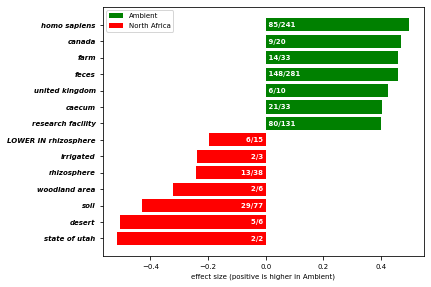

In [26]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True, min_appearances=2, num_results_needed=7,max_show=7,max_id=max_id)

In [27]:
f.set_xlim([-0.6,0.6])

(-0.6, 0.6)

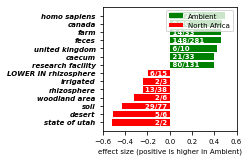

In [28]:
f.figure.set_size_inches(2.5,2)
f.figure

In [29]:
e.feature_metadata.to_csv('./terms-dust.csv')

In [30]:
f.figure.savefig('./fig6-term-dust-israel.pdf')

In [31]:
f.figure.savefig('./fig6-term-dust-israel.svg')

2021-06-06 13:26:54 INFO found 59 annotations with the term ['desert']
2021-06-06 13:26:56 INFO ignored 0 annotations
2021-06-06 13:26:56 WARNING Clipped term circle size to 1000. Real size (number of term seqs not overlapping) should be: 5216


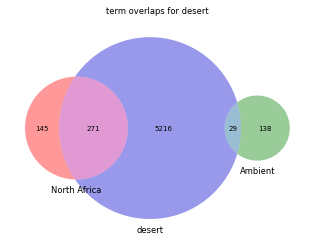

In [32]:
f=db.plot_term_venn_all(['desert'],dd,max_size=1000,max_id=max_id)

In [33]:
f.savefig('fig6-venn-israel-dust-desert.pdf')

2021-06-06 13:26:58 INFO found 1700 annotations with the term ['feces']
2021-06-06 13:26:58 INFO annotation 33 is low
2021-06-06 13:26:58 INFO annotation 35 is low
2021-06-06 13:26:59 INFO annotation 4183 is low
2021-06-06 13:26:59 INFO annotation 4185 is low
2021-06-06 13:26:59 INFO annotation 4186 is low
2021-06-06 13:26:59 INFO annotation 4189 is low
2021-06-06 13:26:59 INFO annotation 97 is low
2021-06-06 13:27:01 INFO annotation 187 is low
2021-06-06 13:27:02 INFO annotation 200 is low
2021-06-06 13:27:06 INFO annotation 554 is low
2021-06-06 13:27:11 INFO annotation 5017 is low
2021-06-06 13:27:12 INFO annotation 5081 is low
2021-06-06 13:27:13 INFO annotation 5104 is low
2021-06-06 13:27:19 INFO annotation 1349 is low
2021-06-06 13:27:23 INFO annotation 5621 is low
2021-06-06 13:27:30 INFO annotation 5933 is low
2021-06-06 13:27:38 INFO annotation 2228 is low
2021-06-06 13:27:40 INFO annotation 2358 is low
2021-06-06 13:27:48 INFO annotation 3035 is low
2021-06-06 13:27:48 INFO 

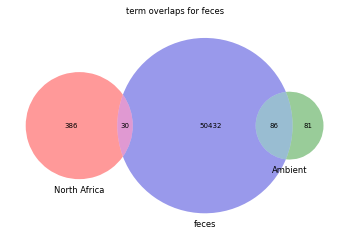

In [34]:
f=db.plot_term_venn_all(['feces'],dd,max_size=1000,max_id=max_id)

In [35]:
f.savefig('sup-term-dust-israel-feces.pdf')

2021-06-06 13:27:59 INFO found 1398 annotations with the term ['homo sapiens']
2021-06-06 13:28:50 INFO ignored 0 annotations
2021-06-06 13:28:50 WARNING Clipped term circle size to 1000. Real size (number of term seqs not overlapping) should be: 13634


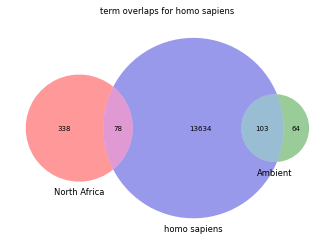

In [36]:
f=db.plot_term_venn_all(['homo sapiens'],dd,max_size=1000,max_id=max_id)

In [37]:
f.savefig('sup-term-dust-israel-homosapiens.pdf')

# American gut
## Fruits

In [11]:
# suppress warning list of samples that have metadata but not data
ca.set_log_level('ERROR')

dat=ca.read_amplicon('./all.ag.biom',
                     './map.ag.txt',
                     normalize=10000,min_reads=1000)
ca.set_log_level('INFO')

In [39]:
fec=dat.filter_samples('BODY_PRODUCT','UBERON:feces')
del dat

In [40]:
fecc=fec.filter_sum_abundance(50)
# merge all samples from a single individual into one sample
fecc=fecc.aggregate_by_metadata('HOST_SUBJECT_ID')

2021-06-06 13:31:17 INFO After filtering, 9720 remain.


In [41]:
def merge_freq(exp, field, new_field='freq'):
    '''merge an ag field with frequecy data
        into a new field with only 2 values (high/low)
    
    input:
    exp
    field : str
        the field to merge
    new_field : str (optional)
        name of the new field
        
    returns
    newexp: calour.Experiment, with values in 2 categories - high & low
    '''
    newexp = exp.copy()
    newexp.sample_metadata[new_field]=newexp.sample_metadata[field].copy()
    newexp.sample_metadata[new_field].replace(['Regularly (3-5 times/week)','Daily'],'high',inplace=True)
    newexp.sample_metadata[new_field].replace(['Rarely (a few times/month)','Never','Occasionally (1-2 times/week)'],'low',inplace=True)
    newexp=newexp.filter_samples(new_field,['low','high'],inplace=True)
    return newexp

In [42]:
tt=merge_freq(fecc,'FRUIT_FREQUENCY')
tt=cu.equalize_groups(tt,'freq',['AGE_CAT','SEX','BMI_CAT'], random_seed=2018)
tt=tt.filter_sum_abundance(10)
dd=tt.diff_abundance('freq','high','low',random_seed=2018)

2021-06-06 13:31:49 INFO After filtering, 7274 remain.
2021-06-06 13:31:50 INFO 2142 samples with both values
2021-06-06 13:31:50 INFO After filtering, 7274 remain.
2021-06-06 13:31:50 INFO 1071 samples with value 1 (['high'])
2021-06-06 13:31:58 INFO number of higher in high: 25. number of higher in low : 25. total 50


In [43]:
tt.sample_metadata.freq.value_counts()

high    1071
low     1071
Name: freq, dtype: int64

2021-06-06 13:31:59 INFO Getting dbBact annotations for 50 sequences, please wait...
2021-06-06 13:32:00 INFO got 1093 annotations
2021-06-06 13:32:00 WARNING ignoring 0 annotation with id > max_id 6237
2021-06-06 13:32:00 INFO Got 4553 annotation-sequence pairs
2021-06-06 13:32:00 INFO Added annotation data to experiment. Total 1093 annotations, 50 ASVs
2021-06-06 13:32:00 INFO Found 1 experiments ([63]) matching current experiment - ignoring them.
2021-06-06 13:32:03 INFO found 7 negative
2021-06-06 13:32:04 INFO found 7 positive


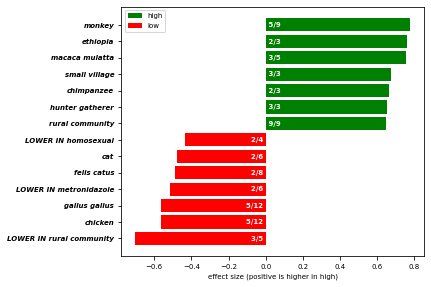

In [44]:
f,e=dd.plot_diff_abundance_enrichment(max_show=7,ignore_exp=True,min_appearances=2, num_results_needed=7, random_seed=2019,max_id=max_id)

In [45]:
f.set_xlim([-0.81,0.81])

(-0.81, 0.81)

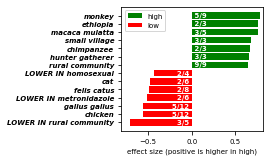

In [46]:
f.figure.set_size_inches(2.8,2)
f.figure

In [47]:
e.feature_metadata.to_csv('./terms-ag-fruit.csv')

In [48]:
f.figure.savefig('fig6-term-ag-fruit.pdf')

In [49]:
f.figure.savefig('fig6-term-ag-fruit.svg')

2021-06-06 13:32:05 INFO Found 1 experiments ([63]) matching current experiment - ignoring them.
2021-06-06 13:32:05 INFO found 74 annotations with the term ['monkey']
2021-06-06 13:32:08 INFO ignored 0 annotations
2021-06-06 13:32:08 WARNING Clipped term circle size to 100. Real size (number of term seqs not overlapping) should be: 5068


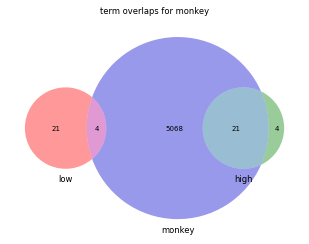

In [50]:
f=db.plot_term_venn_all(["monkey"],dd,max_size=100,ignore_exp=True,max_id=max_id)

In [51]:
f.savefig('fig6-venn-ag-fruit-monkey.pdf')

# Pancreatitis

In [12]:
dat=ca.read_amplicon('./all.pancreatitis.biom',
                    './map.pancreatitis.txt',min_reads=1000, normalize=10000)

2021-06-06 16:01:19 INFO loaded 180 samples, 3027 features
2021-06-06 16:01:19 WARNING Do you forget to normalize your data? It is required before running this function
2021-06-06 16:01:19 INFO After filtering, 180 remain.


In [53]:
datc=dat.cluster_features(10)

2021-06-06 13:32:08 INFO After filtering, 2082 remain.


In [54]:
humpan=datc.filter_samples('Organism','human metagenome')
humpan=humpan.cluster_features(10)

2021-06-06 13:32:08 INFO After filtering, 1208 remain.


In [55]:
dd=humpan.diff_abundance('type','D',['A','B','C'],random_seed=2018)

2021-06-06 13:32:09 INFO 165 samples with both values
2021-06-06 13:32:09 INFO After filtering, 1208 remain.
2021-06-06 13:32:09 INFO 35 samples with value 1 (['D'])
2021-06-06 13:32:09 INFO number of higher in D: 300. number of higher in A,B,C : 39. total 339


2021-06-06 13:32:09 INFO Getting dbBact annotations for 339 sequences, please wait...
2021-06-06 13:32:13 INFO got 2678 annotations
2021-06-06 13:32:13 WARNING ignoring 0 annotation with id > max_id 6237
2021-06-06 13:32:13 INFO Got 35747 annotation-sequence pairs
2021-06-06 13:32:13 INFO Added annotation data to experiment. Total 2678 annotations, 339 ASVs
2021-06-06 13:32:13 INFO Found 1 experiments ([428]) matching current experiment - ignoring them.
2021-06-06 13:32:21 INFO found 7 negative
2021-06-06 13:32:24 INFO found 7 positive


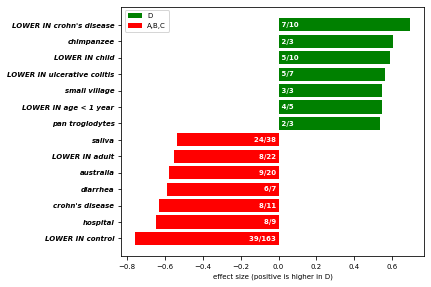

In [56]:
f,e=dd.plot_diff_abundance_enrichment(max_show=7,ignore_exp=True,min_appearances=2, num_results_needed=7, random_seed=2018,max_id=max_id)

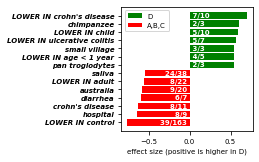

In [57]:
f.figure.set_size_inches(2.6,2)
f.figure

In [58]:
e.feature_metadata.to_csv('./terms-pancreatitis.csv')

In [59]:
f.figure.savefig('./fig6-term-pancreatitis.pdf')

In [60]:
f.figure.savefig('./fig6-term-pancreatitis.svg')

2021-06-06 13:32:26 INFO Found 1 experiments ([428]) matching current experiment - ignoring them.
2021-06-06 13:32:26 INFO found 38 annotations with the term ["crohn's disease"]
2021-06-06 13:32:26 INFO annotation 1920 is low
2021-06-06 13:32:26 INFO annotation 2176 is low
2021-06-06 13:32:26 INFO annotation 2830 is low
2021-06-06 13:32:26 INFO annotation 6175 is low
2021-06-06 13:32:27 INFO annotation 1956 is low
2021-06-06 13:32:27 INFO annotation 2859 is low
2021-06-06 13:32:27 INFO annotation 559 is low
2021-06-06 13:32:27 INFO annotation 2862 is low
2021-06-06 13:32:27 INFO annotation 57 is low
2021-06-06 13:32:27 INFO annotation 5817 is low
2021-06-06 13:32:27 INFO annotation 2793 is low
2021-06-06 13:32:27 INFO ignored 0 annotations


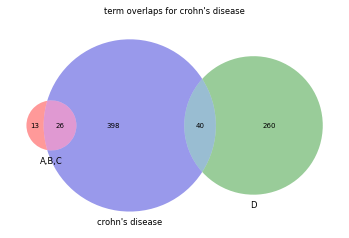

In [61]:
ca.set_log_level('INFO')
f=db.plot_term_venn_all(["crohn's disease"],dd,max_size=1000,ignore_exp=True,max_id=max_id)

In [62]:
f.savefig('fig6-venn-pancreatitis-crohns.pdf')

## look for pancreatitis bacteria not associated with disease
### (i.e. pancreatitis unique ASVs)

In [63]:
iseqs=[]
for cseq in dd.feature_metadata.index.values:
    if cseq not in dd.databases['dbbact']['sequence_annotations']:
        print(' no annotations for %s' % cseq)
        continue
    anno=dd.databases['dbbact']['sequence_annotations'][cseq]
    bfound=0
    for cannoid in anno:
        canno=dd.databases['dbbact']['annotations'][cannoid]
        for cbterm in ["crohn's disease", 'ulcerative colitis']:
            if 'high' in canno['parents']:
                if cbterm in canno['parents']['high']:
                    bfound += 1
    if bfound == 0:
        iseqs.append(cseq)

In [64]:
rr=dd.filter_ids(iseqs)

In [65]:
cu.splot(rr,'type')

In [66]:
qq=rr.filter_by_metadata('_calour_direction',['A,B,C'],axis='f')

In [67]:
cu.splot(qq,'type')

In [68]:
# remove the exp_metadata fields so add_taxonomy will work
qqq=qq.copy()
# del qqq.exp_metadata['____dbbact_term_info']
del qqq.databases['dbbact']['annotations']
del qqq.databases['dbbact']['sequence_terms']
qqq=cu.add_taxonomy(qqq)

2021-06-06 13:35:44 INFO Getting dbBact annotations for 12 sequences, please wait...
2021-06-06 13:35:45 INFO got 827 annotations
2021-06-06 13:35:45 INFO Got 1077 annotation-sequence pairs
2021-06-06 13:35:45 INFO Added annotation data to experiment. Total 827 annotations, 12 ASVs


In [69]:
qqq.feature_metadata.taxonomy.to_csv('pancreatitis-unique-taxa.tsv',sep='\t')

### Draw the per-ASV wordcloud for the 13 pancreatitis unique bacteria

TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGTGGTTTAATAAGTCTGATGTAAAAGGCAGTGGCTCAACCATTGTGTGCATTGGAAACTGTTAGACTTGAGTGCAGTAGAGGAGAGTGGAATTCCATGT
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus
2021-06-06 13:35:52 INFO Getting dbBact annotations for 1 sequences, please wait...
2021-06-06 13:35:52 INFO got 111 annotations
2021-06-06 13:35:52 INFO Got 111 annotation-sequence pairs
TACGAAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTCGTTTAAGTCCGTTGTGAAAGCCCTGGGCTCAACCTGGGAACTGCAGTGGATACTGGGCGACTAGAATGTGGTAGAGGGTAGCGGAATTCCTGG
d__Bacteria;p__"Proteobacteria";c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;g__Stenotrophomonas
2021-06-06 13:35:59 INFO Getting dbBact annotations for 1 sequences, please wait...
2021-06-06 13:35:59 INFO got 52 annotations
2021-06-06 13:35:59 INFO Got 52 annotation-sequence pairs
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGCTGTCT

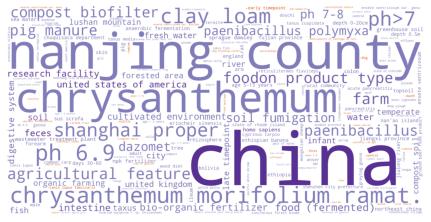

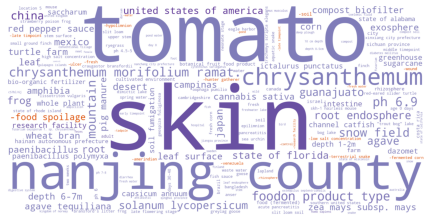

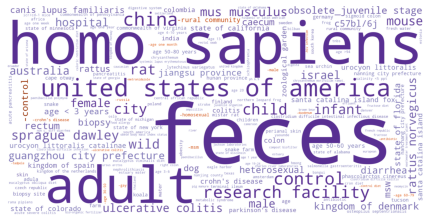

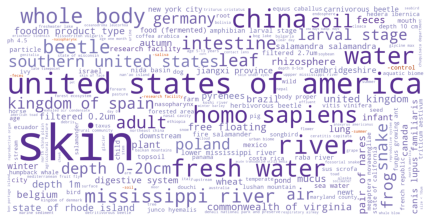

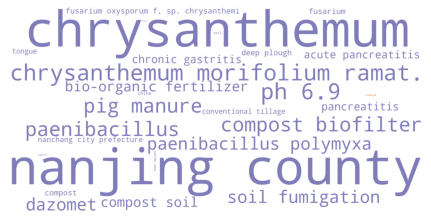

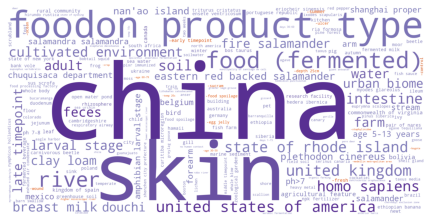

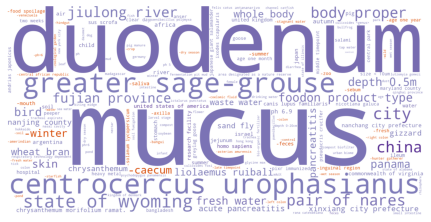

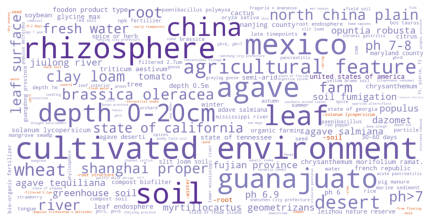

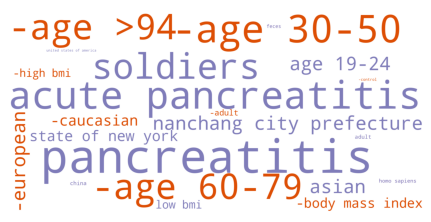

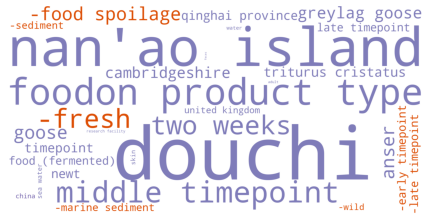

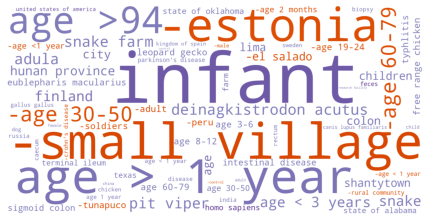

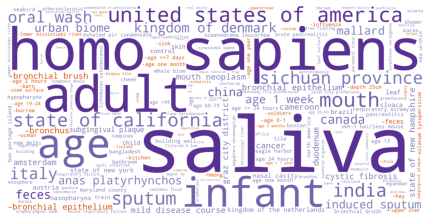

In [70]:
for idx2,(idx, cseq) in enumerate(qqq.feature_metadata.iterrows()):
    print(cseq['_feature_id'])
    print(cseq['taxonomy'])
    f=db.draw_wordcloud(features=[cseq['_feature_id']])
    f.savefig('pancreatitis-wordcloud-%s-%d.pdf' % (cseq['taxonomy'].split('__')[-1], idx2),dpi=300)

In [72]:
# find possible known contaminants
for idx,cseq in enumerate(qqq.feature_metadata.index):
    canno_ids = qqq.databases['dbbact']['sequence_annotations'][cseq]
    for cid in canno_ids:
        canno=qqq.databases['dbbact']['annotations'][cid]
        if canno['annotationtype'] == 'contamination':
            print('%d - %s' % (idx,cseq))
            print(qqq.feature_metadata.iloc[idx]['taxonomy'].split('__')[-1])

0 - TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGTGGTTTAATAAGTCTGATGTAAAAGGCAGTGGCTCAACCATTGTGTGCATTGGAAACTGTTAGACTTGAGTGCAGTAGAGGAGAGTGGAATTCCATGT
Lactococcus
3 - TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG
Pseudomonas
3 - TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG
Pseudomonas
5 - TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGAATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTATGGTAGAGGGTAGTGGAATTTCCTG
Pseudomonas
5 - TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGAATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTATGGTAGAGGGTAGTGGAATTTCCTG
Pseudomonas


### Get the dbBact terms and wordcloud for these pancreatitis unique bacteria

In [74]:
qqq=dd.filter_by_metadata('_calour_direction',['D'],axis='f')
del qqq.databases['dbbact']['sequence_terms']

2021-06-06 13:38:21 INFO Getting dbBact annotations for 300 sequences, please wait...
2021-06-06 13:38:24 INFO got 2176 annotations
2021-06-06 13:38:24 WARNING ignoring 0 annotation with id > max_id 6237
2021-06-06 13:38:24 INFO Got 30083 annotation-sequence pairs
2021-06-06 13:38:24 INFO Added annotation data to experiment. Total 2176 annotations, 300 ASVs


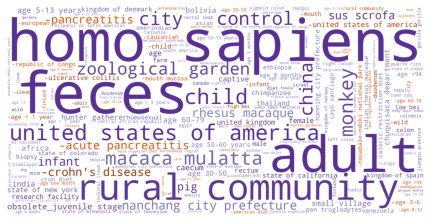

In [75]:
f=db.draw_wordcloud(qqq, max_id=max_id)

In [76]:
f.savefig('./sup-fig-pancreatits-unique-wordcloud.pdf')

In [77]:
fscores, recall, precision, term_count, reduced_f = db.get_wordcloud_stats(qqq, max_id=max_id)

In [85]:
fscores_df = pd.DataFrame(fscores.items(),columns=['term', 'fscore'])

In [88]:
fscores_df.to_csv('./pancreatitis-unique-term-scores.tsv', sep='\t')